In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import re

In [2]:
columns = ["ProductName", "level_1", "level_2", "level_3", "PricePerItem", "PriceMode", "HasMultiBuyDeal",
           "MultiBuyDeal", "MultiBuyBasePrice", "MultiBuyPrice", "MultiBuyQuantity", "PromoBadgeImageLabel"]
df = pd.read_csv("data.csv", usecols=columns)
df.drop_duplicates(inplace=True)
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,Johnson's Baby Lotion,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,NaN,4.89,NaN,NaN,NaN
1,Johnson's Baby Oil,"Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,NaN,4.89,NaN,NaN,NaN
2,SMA Balanced Nutrition From Birth Infant Formula,"Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,NaN,17.99,17.99,1.0,Saver
3,Johnson's Baby Powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,NaN,2.99,2.99,1.0,Saver
4,Johnson's Baby Powder,"Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,NaN,4.89,NaN,NaN,NaN


In [3]:
punctuations = re.compile(r'[^a-zA-Z\s]+')
df["ProductName"] = [punctuations.sub('', x).lower().split() for x in df["ProductName"].tolist()]
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,"[johnsons, baby, lotion]","Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,NaN,4.89,NaN,NaN,NaN
1,"[johnsons, baby, oil]","Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,NaN,4.89,NaN,NaN,NaN
2,"[sma, balanced, nutrition, from, birth, infant...","Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,NaN,17.99,17.99,1.0,Saver
3,"[johnsons, baby, powder]","Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,NaN,2.99,2.99,1.0,Saver
4,"[johnsons, baby, powder]","Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,NaN,4.89,NaN,NaN,NaN


In [4]:
df["MultiBuyDeal"] = [punctuations.sub('', y).lower().split() if y == y else [] for y in df["MultiBuyDeal"].tolist()]
df["MultiBuyDeal"] = [1 if y == ["buy", "for"] else (2 if y == ["buy", "for", "limit", "assorted"] else (
    3 if y == ["limit", "assorted"] else (4 if y == ["limit"] else 0))) for y in df["MultiBuyDeal"].tolist()]
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,"[johnsons, baby, lotion]","Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,0,4.89,NaN,NaN,NaN
1,"[johnsons, baby, oil]","Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,0,4.89,NaN,NaN,NaN
2,"[sma, balanced, nutrition, from, birth, infant...","Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,0,17.99,17.99,1.0,Saver
3,"[johnsons, baby, powder]","Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,0,2.99,2.99,1.0,Saver
4,"[johnsons, baby, powder]","Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,0,4.89,NaN,NaN,NaN


In [5]:
df["PromoBadgeImageLabel"] = [punctuations.sub('', z).lower().split() if z == z else [] for z in
                              df["PromoBadgeImageLabel"].tolist()]
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,"[johnsons, baby, lotion]","Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,0,4.89,NaN,NaN,[]
1,"[johnsons, baby, oil]","Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,0,4.89,NaN,NaN,[]
2,"[sma, balanced, nutrition, from, birth, infant...","Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,0,17.99,17.99,1.0,[saver]
3,"[johnsons, baby, powder]","Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,0,2.99,2.99,1.0,[saver]
4,"[johnsons, baby, powder]","Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,0,4.89,NaN,NaN,[]


In [6]:
df["MultiBuyPrice"].fillna(0, inplace=True)
df["MultiBuyQuantity"].fillna(0, inplace=True)
df.head(5)

,ProductName,level_1,level_2,level_3,PricePerItem,PriceMode,HasMultiBuyDeal,MultiBuyDeal,MultiBuyBasePrice,MultiBuyPrice,MultiBuyQuantity,PromoBadgeImageLabel
0,"[johnsons, baby, lotion]","Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,0,4.89,0.00,0.0,[]
1,"[johnsons, baby, oil]","Baby, Toddler & Kids",Baby Care,Baby Bathing & Skin Care,4.89,ea,False,0,4.89,0.00,0.0,[]
2,"[sma, balanced, nutrition, from, birth, infant...","Baby, Toddler & Kids",Baby Care,Baby Formula & Toddler Food,17.99,ea,False,0,17.99,17.99,1.0,[saver]
3,"[johnsons, baby, powder]","Baby, Toddler & Kids",Baby Care,Nappies & Changing,2.99,ea,False,0,2.99,2.99,1.0,[saver]
4,"[johnsons, baby, powder]","Baby, Toddler & Kids",Baby Care,Nappies & Changing,4.89,ea,False,0,4.89,0.00,0.0,[]


<BarContainer object of 449 artists>

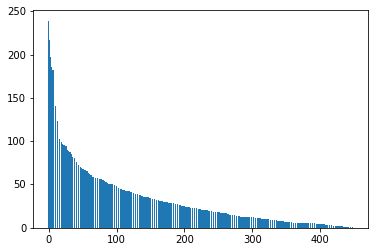

In [7]:
types = df.value_counts(columns[1:4])
plot.bar(x=[a for a in range(types.size)], height=types)

<BarContainer object of 43 artists>

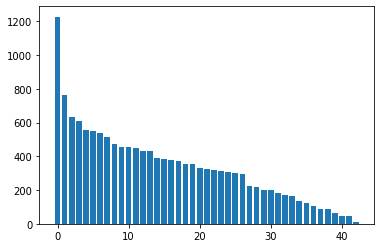

In [8]:
types = df.value_counts(columns[1:3])
plot.bar(x=[a for a in range(types.size)], height=types)

In [9]:
types = df.value_counts(columns[1:2])
types

level_1                    
Pantry                         4740
Personal Care                  1778
Fresh Foods & Bakery           1721
Chilled, Frozen & Desserts     1426
Beer, Cider & Wine             1232
Kitchen, Dining & Household    1182
Drinks                         1063
Pets                            512
Meal Spot                       456
Baby, Toddler & Kids            354
Featured                        121
dtype: int64

(array([1.987e+03, 4.625e+03, 3.241e+03, 1.367e+03, 9.790e+02, 5.380e+02,
        5.520e+02, 1.920e+02, 2.360e+02, 1.720e+02, 1.250e+02, 7.600e+01,
        2.800e+01, 2.000e+01, 2.800e+01, 1.200e+01, 2.200e+01, 6.000e+00,
        1.200e+01, 1.000e+00, 1.200e+01, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.15  ,   2.5668,   4.9836,   7.4004,   9.8172,  12.234 ,
         14.6508,  17.0676,  19.4844,  21.9012,  24.318 ,  26.7348,
         29.1516,  31.5684,  33.9852,  36.402 ,  38.8188,  41.2356,
         43.6524,  46.0692,  48.486 ,  50.9028,  53.3196,  55.7364,
         58.1532,  60.57  ,  62.9868,  65.4036,  67.8204,  70.2372,
         72.654 ,  75.0708,  77.4876

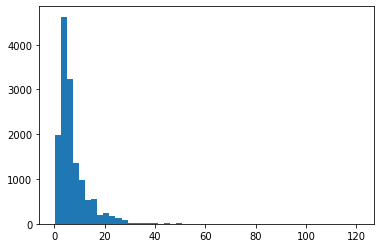

In [10]:
dfea = df[df["PriceMode"] == "ea"]
plot.hist(dfea["PricePerItem"], bins=50)

(array([13., 21., 25., 13., 22., 30., 33.,  9., 41., 19., 45., 11.,  9.,
        14.,  9.,  1.,  3.,  3.,  7.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2.29  ,   4.8422,   7.3944,   9.9466,  12.4988,  15.051 ,
         17.6032,  20.1554,  22.7076,  25.2598,  27.812 ,  30.3642,
         32.9164,  35.4686,  38.0208,  40.573 ,  43.1252,  45.6774,
         48.2296,  50.7818,  53.334 ,  55.8862,  58.4384,  60.9906,
         63.5428,  66.095 ,  68.6472,  71.1994,  73.7516,  76.3038,
         78.856 ,  81.4082,  83.9604,  86.5126,  89.0648,  91.617 ,
         94.1692,  96.7214,  99.2736, 101.8258, 104.378 , 106.9302,
        109.4824, 112.0346, 114.5868, 117.139 , 119.6912, 122.2434,
        124.7956, 127.3478, 129.9   ]),
 <BarContainer object of 50 artists>)

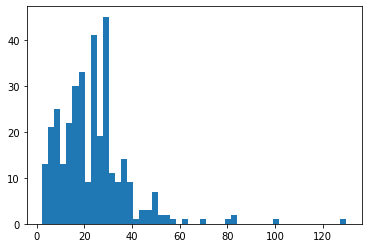

In [11]:
dfkg = df[df["PriceMode"] == "kg"]
plot.hist(dfkg["PricePerItem"], bins=50)
